In [6]:


def Eulers_Method(x_len, initial_x, initial_y, h): 

    k=0.1
    import math
    diff_eq= lambda x,y:(math.log(y)/(y-x))*(-x**4)
    
    diff = x_len-initial_x
    soln = []
    yval=[]
    xval=[]
    xval+=[initial_x]
    yval+=[initial_y]
    for i in range(1, h+1):
        try:
            x0 = ((i-1)/h)*(diff)+initial_x

            yprime = diff_eq(x0, initial_y)
            
            xval+=[x0]

            initial_y+=yprime*((diff)/h)

            yval+=[initial_y]
       
        except (OverflowError, ZeroDivisionError, ValueError):
            break
    soln +=[xval, yval]

    return soln


In [7]:

def upper_bound_filter(data):
    standard =data[-1]

    stand_max=max([point[1] for point in standard])

    for dat in data:
        xmax=max([point[0] for point in dat])
        if xmax>stand_max:
            data.remove(dat)


    return data

Enter y range to plot solutions (start y, end y):50,100
Enter x range to plot solutions (start x, end x):0,200
How many solns?300
[0.0, 0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.13999999999999999, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.27999999999999997, 0.3, 0.32, 0.33999999999999997, 0.36, 0.38, 0.4, 0.42, 0.44, 0.45999999999999996, 0.48, 0.5, 0.52, 0.54, 0.5599999999999999, 0.58, 0.6, 0.62, 0.64, 0.66, 0.6799999999999999, 0.7000000000000001, 0.72, 0.74, 0.76, 0.7799999999999999, 0.8, 0.8200000000000001, 0.84, 0.86, 0.88, 0.8999999999999999, 0.9199999999999999, 0.9400000000000001, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06, 1.08, 1.0999999999999999, 1.1199999999999999, 1.1400000000000001, 1.16, 1.18, 1.2, 1.22, 1.24, 1.26, 1.28, 1.3, 1.32, 1.34, 1.3599999999999999, 1.38, 1.4000000000000001, 1.4200000000000002, 1.44, 1.46, 1.48, 1.5, 1.52, 1.54, 1.5599999999999998, 1.58, 1.6, 1.6199999999999999, 1.6400000000000001, 1.66, 1.68, 1.7000000000000002, 1.72, 1.7399999999999998, 1.76, 1.78, 1.799999999

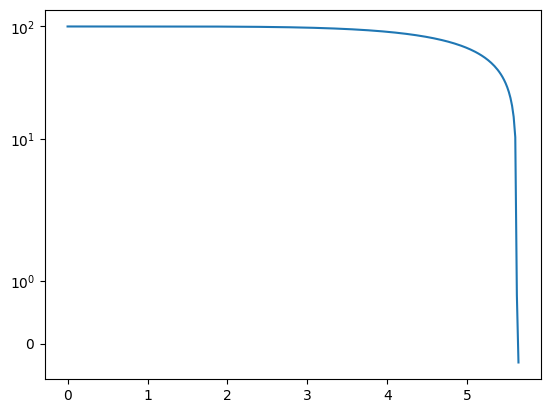

In [13]:


import numpy as np
import matplotlib.pyplot as plt
# import matplotlib

# matplotlib.use('AGG')

# Function to get input values
def get_input(prompt):
    return input(prompt).split(',')

# Get user input for ranges
yrange = get_input('Enter y range to plot solutions (start y, end y):')
xrange = get_input('Enter x range to plot solutions (start x, end x):')

xinitial = float(xrange[0])
xfinal = float(xrange[1])

yinitial = float(yrange[0])
yfinal = float(yrange[1])

soln_number = int(input("How many solns?"))

# Generate initial y values
yinit = np.linspace(yinitial, yfinal, soln_number)

soln_list = []
# Compute solutions using Euler's Method
for i in range(len(yinit)):
    soln_list.append(Eulers_Method(np.fabs(xfinal - xinitial), xinitial, yinit[i], 10000))

# Plotting
colormap = plt.get_cmap('plasma')
length = len(soln_list)

for dat in soln_list:
    print(dat[0])
    
    
plt.plot(soln_list[-1][0],soln_list[-1][1])
plt.yscale('symlog')

plt.show()

#filter the data

# soln_list=upper_bound_filter(soln_list)

# for i in range(len(soln_list)):
#     x_data = soln_list[i][0]
#     y_data = soln_list[i][1]
#     plt.plot(x_data, y_data, linewidth=0.3, color=colormap(i / length))
